In [27]:
# The usual preamble
%matplotlib inline
#%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 1000)

plt.rcParams['figure.figsize'] = (15, 5)

In [86]:
sfcrime = pd.read_csv('../data/train.csv',parse_dates='Dates',index_col='Dates')
sfcrime

Category                                           Descript  DayOfWeek  PdDistrict                              Resolution                                Address           X          Y
Dates                                                                                                                                                                                                                           
2015-05-13 23:53:00                     WARRANTS                                     WARRANT ARREST  Wednesday    NORTHERN                          ARREST, BOOKED                     OAK ST / LAGUNA ST -122.425892  37.774599
2015-05-13 23:53:00               OTHER OFFENSES                           TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN                          ARREST, BOOKED                     OAK ST / LAGUNA ST -122.425892  37.774599
2015-05-13 23:33:00               OTHER OFFENSES                           TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN                          ARREST, BOOKED              VANNESS AV / GREENWICH ST -122.424363  37.800414
2015-05-13 23:30:00                LARCENY/THEFT                       GRAND THEFT FROM LOCKED AUTO  Wednesday    NORTHERN                                    NONE               1500 Block of LOMBARD ST -122.426995  37.800873
2015-05-13 23:30:00                LARCENY/THEFT                       GRAND THEFT FROM LOCKED AUTO  Wednesday        PARK                                    NONE              100 Block of BRODERICK ST -122.438738  37.771541
2015-05-13 23:30:00                LARCENY/THEFT                     GRAND THEFT FROM UNLOCKED AUTO  Wednesday   INGLESIDE                                    NONE                    0 Block of TEDDY AV -122.403252  37.713431
2015-05-13 23:30:00                VEHICLE THEFT                                  STOLEN AUTOMOBILE  Wednesday   INGLESIDE                                    NONE                    AVALON AV / PERU AV -122.423327  37.725138
2015-05-13 23:30:00                VEHICLE THEFT                                  STOLEN AUTOMOBILE  Wednesday     BAYVIEW                                    NONE               KIRKWOOD AV / DONAHUE ST -122.371274  37.727564
2015-05-13 23:00:00                LARCENY/THEFT                       GRAND THEFT FROM LOCKED AUTO  Wednesday    RICHMOND                                    NONE                   600 Block of 47TH AV -122.508194  37.776601
2015-05-13 23:00:00                LARCENY/THEFT                       GRAND THEFT FROM LOCKED AUTO  Wednesday     CENTRAL                                    NONE          JEFFERSON ST / LEAVENWORTH ST -122.419088  37.807802
2015-05-13 22:58:00                LARCENY/THEFT                       PETTY THEFT FROM LOCKED AUTO  Wednesday     CENTRAL                                    NONE          JEFFERSON ST / LEAVENWORTH ST -122.419088  37.807802
2015-05-13 22:30:00               OTHER OFFENSES                        MISCELLANEOUS INVESTIGATION  Wednesday     TARAVAL                                    NONE                  0 Block of ESCOLTA WY -122.487983  37.737667
2015-05-13 22:30:00                    VANDALISM          MALICIOUS MISCHIEF, VANDALISM OF VEHICLES  Wednesday  TENDERLOIN                                    NONE                     TURK ST / JONES ST -122.412414  37.783004
2015-05-13 22:06:00                LARCENY/THEFT                       GRAND THEFT FROM LOCKED AUTO  Wednesday    NORTHERN                                    NONE                 FILLMORE ST / GEARY BL -122.432915  37.784353
2015-05-13 22:00:00                 NON-CRIMINAL                                     FOUND PROPERTY  Wednesday     BAYVIEW                                    NONE               200 Block of WILLIAMS AV -122.397744  37.729935
2015-05-13 22:00:00                 NON-CRIMINAL                                     FOUND PROPERTY  Wednesday     BAYVIEW                                    NONE                  0 Block of MENDELL ST -122.383692  

What are the different types of crimes?

In [3]:
sfcrime['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

How do different crimes vary by time of day?
Add features for the hour in the day, day of the week, year, month, and day of the year.

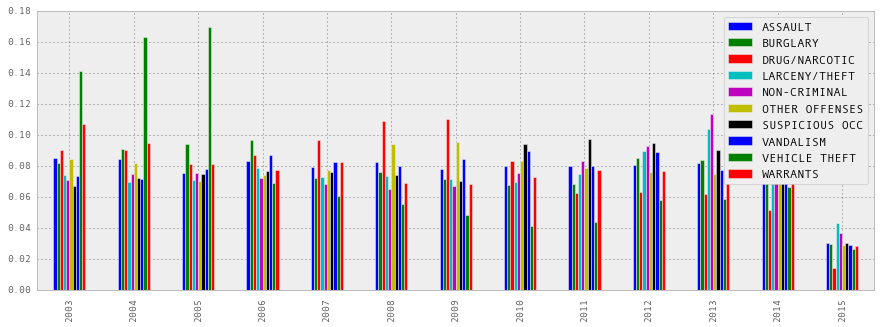

In [4]:
def crime_by_time(df,crime,unit="Hour"):
    crime = df[df['Category'] == crime].copy()
    if unit=="Hour":
        crime.loc[:,unit] = crime.index.hour
    elif unit=="Day":
        crime.loc[:,unit] = crime.index.dayofyear
    elif unit=="Year":
        crime.loc[:,unit] = crime.index.year
    elif unit=="Month":
        crime.loc[:,unit] = crime.index.month
    elif unit=="Weekday":
        crime.loc[:,unit] = crime.index.weekday

    crime[unit].astype(int)
    return crime[unit].value_counts()

topCrimes = 10
dset = {}
for category,norm in zip(sfcrime['Category'].value_counts()[:topCrimes].index,sfcrime['Category'].value_counts()[:topCrimes]):
    dset[category]=crime_by_time(sfcrime,category,unit="Year") 
    dset[category] = dset[category].div(norm)
combined = pd.DataFrame(dset)
combined.sort_index().plot(kind='bar')
#.sort_index().plot() #kind='bar')
sfcrime['Hour'] = sfcrime.index.hour
sfcrime['Weekday'] = sfcrime.index.weekday
sfcrime['Year'] = sfcrime.index.year
sfcrime['Month'] = sfcrime.index.month
sfcrime['Day'] = sfcrime.index.dayofyear
#sfcrime

And in which districts?

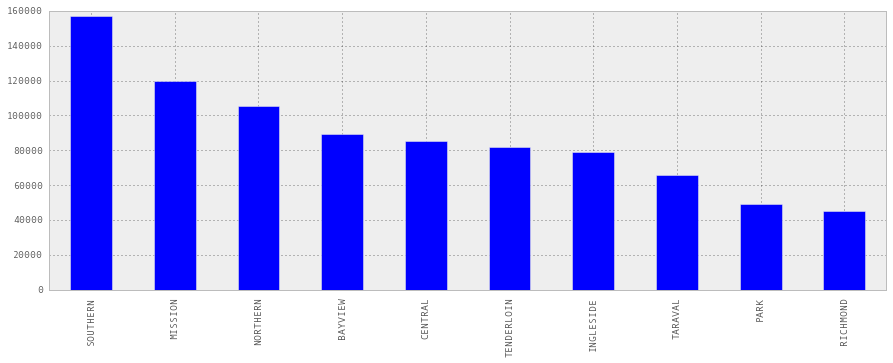

In [5]:
sfcrime['PdDistrict'].value_counts().plot(kind='bar')

Are certain crimes more common in certain districts? 
Here I add a feature for each category which encodes the relative fractions of crimes of that type for the district. So, for instance 48% of prostitution cases occur in the mission district so the value of the 'PROSTITUTION' feature is 0.48 for crimes occuring in that district.
One problem with this is that it is derived in the training data.

In [6]:

def group_by_district(df, district):
    return df[df['PdDistrict']==district].copy()
dset = {}
for district in sfcrime['PdDistrict'].unique():
    dset[district] = group_by_district(sfcrime,district)['Category'].value_counts()
dfCrimesPerDistrict = pd.DataFrame(dset)
normalizedByCrimeDF = dfCrimesPerDistrict.div(dfCrimesPerDistrict.sum(axis=1), axis=0)
normalizedByCrimeDF 

crimeRateFeatures = normalizedByCrimeDF[sfcrime['PdDistrict']].transpose()
crimeRateFeatures.index = sfcrime.index
for category in crimeRateFeatures:
    sfcrime[category] = crimeRateFeatures[category]
normalizedByCrimeDF.transpose()

ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  EMBEZZLEMENT  EXTORTION  FAMILY OFFENSES  FORGERY/COUNTERFEITING     FRAUD  GAMBLING  KIDNAPPING  LARCENY/THEFT  LIQUOR LAWS  LOITERING  MISSING PERSON  NON-CRIMINAL  OTHER OFFENSES  PORNOGRAPHY/OBSCENE MAT  PROSTITUTION  RECOVERED VEHICLE   ROBBERY   RUNAWAY  SECONDARY CODES  SEX OFFENSES FORCIBLE  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC      TREA  TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS
BAYVIEW     0.259749  0.128219    0.083744  0.193772  0.106924            0.050694                     0.078924       0.083341     0.056776      0.085763   0.050781         0.148676                0.072957  0.051922  0.198630    0.133704       0.057856     0.059905   0.040816        0.193851      0.066075        0.135146                 0.090909      0.009353           0.234226  0.118043  0.136177         0.166450               0.088195                   0.148649         0.087445  0.072835        0.124339  0.500000  0.086814   0.119754       0.134230  0.102383     0.192519
CENTRAL     0.073364  0.090757    0.160099  0.041522  0.122949            0.114352                     0.070547       0.033444     0.120794      0.154374   0.199219         0.057026                0.107833  0.140536  0.212329    0.084152       0.143282     0.074094   0.057143        0.051868      0.118521        0.070541                 0.090909      0.103955           0.056724  0.086913  0.022097         0.070506               0.089790                   0.047297         0.112335  0.118110        0.090469  0.166667  0.123396   0.099922       0.078280  0.065784     0.056926
INGLESIDE   0.120291  0.110997    0.078818  0.183391  0.090627            0.039583                     0.090829       0.043968     0.044393      0.066895   0.113281         0.144603                0.092092  0.072726  0.109589    0.148654       0.058525     0.055702   0.021224        0.122398      0.074244        0.104635                      NaN      0.003474           0.210962  0.121217  0.076053         0.130195               0.114859                   0.148649         0.076432  0.127953        0.100815       NaN  0.056784   0.120157       0.166602  0.059885     0.132086
MISSION     0.095836  0.145026    0.113300  0.228374  0.101891            0.254398                     0.157407       0.162254     0.182710      0.106346   0.101562         0.289206                0.120747  0.118113  0.123288    0.133276       0.104191     0.260116   0.155918        0.126323      0.134035        0.153191                 0.136364      0.484901           0.103569  0.157783  0.153135         0.144116               0.163628                   0.236486         0.138987  0.141732        0.121220  0.166667  0.139367   0.118368       0.132909  0.156702     0.155348
NORTHERN    0.098480  0.108200    0.133005  0.062284  0.159271            0.104630                     0.114638       0.083582     0.085981      0.112350   0.093750         0.024440                0.121783  0.123209  0.068493    0.098676       0.163694     0.065160   0.157551        0.075263      0.110938        0.096947                 0.227273      0.244655           0.086998  0.114783  0.045221         0.100050               0.099134                   0.060811         0.154185  0.131890        0.104094  0.166667  0.106470   0.120827       0.116974  0.108945     0.092227
PARK        0.042961  0.045723    0.036946  0.024221  0.078574            0.062731                     0.077601       0.047674     0.087383      0.042882   0.031250         0.052953                0.048826  0.058397  0.006849    0.040154       0.052293     0.078297   0.018776        0.104390      0.064190        0.049009                      NaN      0.000668           0.037285  0.041609  0.249229         0.044467               0.048314                   0.040541         0.038546  0.039370        0.052715       NaN  0.039585   0.

The distribution of crimes per district does not vary too much. One insight though is that the Tenderloin clearly has a Drug/Narcotic problem with 21.6% of it's crimes coming from that while in the other districts it's only a few percent.

Here are just some of the striking differences:
ARSON is much more common in BAYVIEW
DISORDERLY CONDUCT in the MISSION and TENDERLOIN
DRUNKENNESS in MISSION and SOUTHERN
FAMILY OFFSENSE in MISSION
FORGERY/COUNTERFEITING in SOUTHERN
LARCENY/THEFT in SOUTHERN
Half of all PROSTITUTION occurs in MISSION with another quarter in NORTHERN

This suggests it would be useful to use geography as a predictor. I could also try to use the exact location. It would be interesting to look at some heat maps of each set of crimes.
What about trying to relate specific crimes to each other?

It would be nice to not just have the police district but also it's proximity to other police districts. Here I've attempted to encode this information but adding a feature for each district which tells how close it is to other districts.

In [7]:
#Matrix of proximities with rows of districts in alphabetical order
#This should encode geographic proximities (or correlations) between districts
#This should be a symmetric matrix
#if the district is equal (i.e. diagonal) it gets a 1
#if they share a border it gets a 0.5
#if they do not share a border then they get a 0 unless the borders are unusual and they
#are very close. In that case I use some judgement and assin 0.25
#BAYVIEW	CENTRAL	INGLESIDE	MISSION	NORTHERN	PARK	RICHMOND	SOUTHERN	TARAVAL	TENDERLOIN
geographicProximity = [[1,0,.5,.5,0,0,0,.5,0,0], #bayview
                       [0,1,0,0,.5,0,0,.5,0,.5],#central
                       [.5,0,1,.5,0,.5,0,0,.5,0], #ingleside
                       [.5,0,.5,1,.25,.5,0,.5,0,.25],#mission
                       [0,.5,0,.25,1,.5,.5,.5,0,.5],#northern
                       [0,0,.5,.5,.5,1,.5,.25,.5,.25], #park
                       [0,0,0,0,.5,.5,1,0,.5,0],#richmond
                       [.5,.5,0,.5,.5,.25,0,1,0,.5], #southern
                       [0,0,.5,0,0,.5,.5,0,1,0], #taraval
                       [0,.5,0,.25,.5,.25,0,.5,0,1] #tenderloin
                       ]
geographicProximityMatrix = np.matrix(geographicProximity)
geographicProximityMatrix
print "Dimension:",geographicProximityMatrix.shape
print "Is Symmetric:",(geographicProximityMatrix.transpose()==geographicProximityMatrix).all()
dset={}
for row,header in zip(geographicProximity,np.sort(sfcrime['PdDistrict'].unique())):
    #print row,header
    dset[header]=row
geographicProximityDF = pd.DataFrame(dset)
geographicProximityDF.index = np.sort(sfcrime['PdDistrict'].unique())

geographicProximityDF['BAYVIEW'][sfcrime['PdDistrict']]
for district in geographicProximityDF.index:
    districtCol = geographicProximityDF[district][sfcrime['PdDistrict']]
    districtCol.index = sfcrime.index
    sfcrime[district] = districtCol
#now we have extra features which encode proximity to other districts
sfcrime

Dimension: (10, 10)
Is Symmetric: True


Category                                   Descript  DayOfWeek  PdDistrict      Resolution                        Address           X          Y  Hour  Weekday  Year  Month  Day     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  EMBEZZLEMENT  EXTORTION  FAMILY OFFENSES  FORGERY/COUNTERFEITING     FRAUD  GAMBLING  KIDNAPPING  LARCENY/THEFT     ...      MISSING PERSON  NON-CRIMINAL  OTHER OFFENSES  PORNOGRAPHY/OBSCENE MAT  PROSTITUTION  RECOVERED VEHICLE   ROBBERY   RUNAWAY  SECONDARY CODES  SEX OFFENSES FORCIBLE  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC      TREA  TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  SOUTHERN  TARAVAL  TENDERLOIN
Dates                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ...                                                                                                                                                                                                                                                                                                                                                                                                                  
2015-05-13 23:53:00                WARRANTS                             WARRANT ARREST  Wednesday    NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST -122.425892  37.774599    23        2  2015      5  133  0.098480  0.108200    0.133005  0.062284  0.159271            0.104630                     0.114638       0.083582     0.085981      0.112350   0.093750         0.024440                0.121783  0.123209  0.068493    0.098676       0.163694     ...            0.075263      0.110938        0.096947                 0.227273      0.244655           0.086998  0.114783  0.045221         0.100050               0.099134                   0.060811         0.154185  0.131890        0.104094  0.166667  0.106470   0.120827       0.116974  0.108945     0.092227      0.0      0.5        0.0     0.25      1.00  0.50       0.5      0.50      0.0        0.50
2015-05-13 23:53:00          OTHER OFFENSES                   TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST -122.425892  37.774599    23        2  2015      5  133  0.098480  0.108200    0.133005  0.062284  0.159271            0.104630                     0.114638       0.083582     0.085981      0.112350   0.093750         0.024440                0.121783  0.123209  0.068493    0.098676       0.163694     ...            0.075263      0.110938        0.096947                 0.227273      0.244655           0.086998  0.114783  0.045221         0.100050               0.099134                   0.060811         0.154185  0.131890        0.104094  0.166667  0.106470   0.120827       0.116974  0.108945     0.092227      0.0      0.5        0.0     0.25      1.00  0.50       0.5      0.50      0.0        0.50
2015-05-13 23:33:00          OTHER OFFENSES                   TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN  ARREST, BOOKED      VANNESS AV / GREENWICH ST -122.424363  37.800414    23        2  2015      5  133  0.098480  0.108200    0.133005  0.062284  0.159271            0.104630                     0.114638       0.083582     0.085981      0.112350   0.093750         0.024440                0.121783  0.123209  0.068493    0.098676       0.163694     ...            0.075263      0.110938        0.096947                 0.227273      0.244655           0.086998  0.1

Are certain crimes more likely to be associated with a given oucome?
Definitely. For instance, the vast majority of 'RESOLUTION' of 'LOCATED' are from 'MISSING PERSON' or 'RUNAWAY'

In [8]:
sfcrime['Resolution'].value_counts()
sfcrime[sfcrime['Resolution']=='LOCATED']['Category'].value_counts()

MISSING PERSON                 15012
RUNAWAY                         1217
NON-CRIMINAL                     448
SUSPICIOUS OCC                   110
OTHER OFFENSES                   105
ASSAULT                           40
SECONDARY CODES                   34
LARCENY/THEFT                     21
VANDALISM                         15
KIDNAPPING                        14
SUICIDE                           11
WARRANTS                          11
VEHICLE THEFT                     10
TRESPASS                           8
DRUG/NARCOTIC                      8
BURGLARY                           5
PROSTITUTION                       5
SEX OFFENSES FORCIBLE              5
DISORDERLY CONDUCT                 4
ROBBERY                            3
FRAUD                              3
SEX OFFENSES NON FORCIBLE          2
DRUNKENNESS                        2
WEAPON LAWS                        2
LOITERING                          1
DRIVING UNDER THE INFLUENCE        1
STOLEN PROPERTY                    1
L

Have certain crimes changed over time?

In [12]:
sfcrime[sfcrime['Category']=='BURGLARY']['Year'].value_counts()

2006    3550
2005    3463
2004    3330
2012    3135
2013    3070
2003    3017
2014    3006
2008    2800
2007    2655
2009    2633
2011    2515
2010    2491
2015    1090
Name: Year, dtype: int64

Ideas about feature engineering:
One per crime that says the fraction per district
One per district that tells the proximity to other districts: 1 if it is the district, .5 if it shares a border, 0 otherwise
Another that relates the relative overall number of crimes to the district
Might want to check time dependence to see if it makes sense to use same crime per district stats for all time

Should have features for hour, day of week, day of year, year

What about street names? Some of them do seem to be very correlated with certain crimes.
The problem with these addresses is that they contain very little information about proximity to each other. But, they might highlight problem streets.
What if I set those that only have a couple of counts to 'Other'?
This isn't working

In [118]:
#sfcrime[sfcrime['Address']=='100 Block of JEFFERSON ST']['Category'].value_counts()
streetCheck = sfcrime['Address'].value_counts() <100
isOther = streetCheck[sfcrime['Address']]
isOther.index = sfcrime.index
testall = sfcrime.copy()
#test=sfcrime[isOther==True].copy()

testall.loc[(isOther==True).index,'Address']='Other'

testall['Address'].value_counts()
#nonCrimeStreets = streetsCheck[sfcrime['Address']]
#nonCrimeStreets.index = sfcrime.index
#nonCrimeStreets = nonCrimeStreets[nonCrimeStreets== True]
#nonCrimeStreets

#sfcrime.loc[nonCrimeStreets.index,'Address']='Other'
#sfcrime['Address'].value_counts()


Other    878049
Name: Address, dtype: int64

What about these descriptions? They seem to tell an awful lot. Do I get these? No. They are only in the training set.